### **IMPORT LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **LOAD THE DATASET**

In [3]:
accounts=pd.read_csv(r"D:\Future Intern\task_02\data\raw\ravenstack_accounts.csv")
subscriptions=pd.read_csv(r"D:\Future Intern\task_02\data\raw\ravenstack_subscriptions.csv")
feature_usage=pd.read_csv(r"D:\Future Intern\task_02\data\raw\ravenstack_feature_usage.csv")
support_tickets=pd.read_csv(r"D:\Future Intern\task_02\data\raw\ravenstack_support_tickets.csv")
churn_events=pd.read_csv(r"D:\Future Intern\task_02\data\raw\ravenstack_churn_events.csv")

In [5]:
accounts.head()
accounts.shape

(500, 10)

In [6]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   account_id       500 non-null    object
 1   account_name     500 non-null    object
 2   industry         500 non-null    object
 3   country          500 non-null    object
 4   signup_date      500 non-null    object
 5   referral_source  500 non-null    object
 6   plan_tier        500 non-null    object
 7   seats            500 non-null    int64 
 8   is_trial         500 non-null    bool  
 9   churn_flag       500 non-null    bool  
dtypes: bool(2), int64(1), object(7)
memory usage: 32.4+ KB


In [8]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_id    5000 non-null   object
 1   account_id         5000 non-null   object
 2   start_date         5000 non-null   object
 3   end_date           486 non-null    object
 4   plan_tier          5000 non-null   object
 5   seats              5000 non-null   int64 
 6   mrr_amount         5000 non-null   int64 
 7   arr_amount         5000 non-null   int64 
 8   is_trial           5000 non-null   bool  
 9   upgrade_flag       5000 non-null   bool  
 10  downgrade_flag     5000 non-null   bool  
 11  churn_flag         5000 non-null   bool  
 12  billing_frequency  5000 non-null   object
 13  auto_renew_flag    5000 non-null   bool  
dtypes: bool(5), int64(3), object(6)
memory usage: 376.1+ KB


In [9]:
feature_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   usage_id             25000 non-null  object
 1   subscription_id      25000 non-null  object
 2   usage_date           25000 non-null  object
 3   feature_name         25000 non-null  object
 4   usage_count          25000 non-null  int64 
 5   usage_duration_secs  25000 non-null  int64 
 6   error_count          25000 non-null  int64 
 7   is_beta_feature      25000 non-null  bool  
dtypes: bool(1), int64(3), object(4)
memory usage: 1.4+ MB


In [10]:
support_tickets.info()
support_tickets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ticket_id                    2000 non-null   object 
 1   account_id                   2000 non-null   object 
 2   submitted_at                 2000 non-null   object 
 3   closed_at                    2000 non-null   object 
 4   resolution_time_hours        2000 non-null   float64
 5   priority                     2000 non-null   object 
 6   first_response_time_minutes  2000 non-null   int64  
 7   satisfaction_score           1175 non-null   float64
 8   escalation_flag              2000 non-null   bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 127.1+ KB


,ticket_id,account_id,submitted_at,closed_at,resolution_time_hours,priority,first_response_time_minutes,satisfaction_score,escalation_flag
0,T-0024de,A-712f1c,2023-07-27,2023-07-28 03:00:00,27.0,high,74,NaN,False
1,T-4d04b9,A-e43bf7,2024-07-08,2024-07-09 03:00:00,27.0,urgent,144,NaN,False
2,T-d5e12f,A-0f3e88,2024-10-17,2024-10-17 19:00:00,19.0,urgent,93,4.0,False
3,T-dfce9a,A-4c56c9,2024-09-08,2024-09-09 23:00:00,47.0,medium,126,5.0,False
4,T-c59f77,A-6f8ad2,2024-11-30,2024-12-01 02:00:00,26.0,medium,8,NaN,False


In [11]:
churn_events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn_event_id            600 non-null    object 
 1   account_id                600 non-null    object 
 2   churn_date                600 non-null    object 
 3   reason_code               600 non-null    object 
 4   refund_amount_usd         600 non-null    float64
 5   preceding_upgrade_flag    600 non-null    bool   
 6   preceding_downgrade_flag  600 non-null    bool   
 7   is_reactivation           600 non-null    bool   
 8   feedback_text             452 non-null    object 
dtypes: bool(3), float64(1), object(5)
memory usage: 30.0+ KB


### convert date column

In [12]:
accounts['signup_date'] = pd.to_datetime(accounts['signup_date'])
subscriptions['start_date'] = pd.to_datetime(subscriptions['start_date'])
subscriptions['end_date'] = pd.to_datetime(subscriptions['end_date'])
feature_usage['usage_date'] = pd.to_datetime(feature_usage['usage_date'])
support_tickets['submitted_at'] = pd.to_datetime(support_tickets['submitted_at'])
support_tickets['closed_at'] = pd.to_datetime(support_tickets['closed_at'])
churn_events['churn_date'] = pd.to_datetime(churn_events['churn_date'])


### Overall Churn Rate

In [13]:
total_account=accounts.shape[0]
churned_accounts=accounts["churn_flag"].sum()
churn_rate=churned_accounts/total_account
print(churn_rate)

0.22


In [14]:
#churn by plan tier
churn_by_plan = (
    accounts
    .groupby('plan_tier')['churn_flag']
    .mean()
    .reset_index()
    .rename(columns={'churn_flag': 'churn_rate'})
)

churn_by_plan


,plan_tier,churn_rate
0,Basic,0.220238
1,Enterprise,0.220779
2,Pro,0.219101


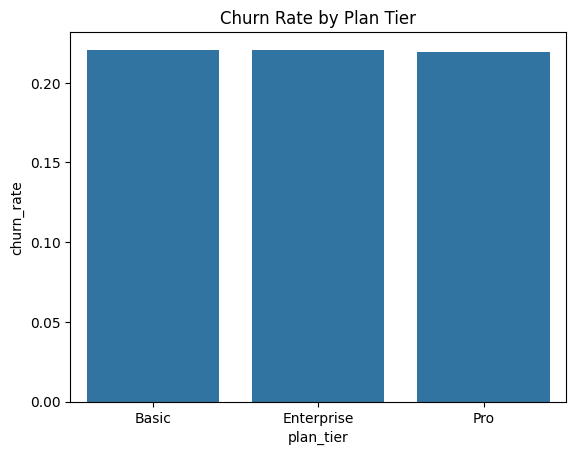

In [15]:
sns.barplot(data=churn_by_plan, x='plan_tier', y='churn_rate')
plt.title("Churn Rate by Plan Tier")
plt.show()


In [16]:
#customer lifetime tenure
accounts_churn=accounts.merge(churn_events[['account_id','churn_date']],
                             on='account_id',
                             how='left')
accounts_churn

,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,seats,is_trial,churn_flag,churn_date
0,A-2e4581,Company_0,EdTech,US,2024-10-16,partner,Basic,9,False,False,2024-11-23
1,A-2e4581,Company_0,EdTech,US,2024-10-16,partner,Basic,9,False,False,2024-12-05
2,A-43a9e3,Company_1,FinTech,IN,2023-08-17,other,Basic,18,False,True,NaT
3,A-0a282f,Company_2,DevTools,US,2024-08-27,organic,Basic,1,False,False,2024-10-06
4,A-0a282f,Company_2,DevTools,US,2024-08-27,organic,Basic,1,False,False,2024-12-31
...,...,...,...,...,...,...,...,...,...,...,...
743,A-55f257,Company_496,FinTech,US,2023-12-21,organic,Basic,9,False,False,NaT
744,A-d26ab4,Company_497,DevTools,UK,2024-11-07,organic,Basic,9,False,True,2024-12-26
745,A-712533,Company_498,EdTech,US,2023-07-31,organic,Pro,18,False,False,2024-07-18
746,A-781cc0,Company_499,EdTech,US,2024-09-04,organic,Pro,12,False,False,2024-12-09


In [17]:
#we need to fill the nah in end date
accounts_churn['end_date']=accounts_churn['churn_date'].fillna(pd.Timestamp.today())
accounts_churn['tenure_days']=(accounts_churn['end_date']-accounts_churn['signup_date']).dt.days
accounts_churn.groupby('churn_flag')['tenure_days'].mean()

churn_flag
False    273.557093
True     318.494118
Name: tenure_days, dtype: float64

In [20]:
#aggregate feature usage per subscription
feature_summary=(feature_usage.groupby('subscription_id').agg(
    total_usage=('usage_count','sum'),
    total_duration=('usage_duration_secs','sum'),
    total_errors=('error_count','sum')
)
.reset_index()
)
feature_summary

,subscription_id,total_usage,total_duration,total_errors
0,S-001561,48,21604,3
1,S-0027d3,44,20848,0
2,S-003647,71,13018,3
3,S-003fc0,43,11933,1
4,S-004d19,18,5616,0
...,...,...,...,...
4962,S-ffce65,102,28034,0
4963,S-ffd1ee,83,22905,1
4964,S-ffd591,11,3033,0
4965,S-ffe125,78,26363,0


In [21]:
sub_features=subscriptions.merge(feature_summary,
                                on='subscription_id',
                                how='left')

In [23]:
sub_features

,subscription_id,account_id,start_date,end_date,plan_tier,seats,mrr_amount,arr_amount,is_trial,upgrade_flag,downgrade_flag,churn_flag,billing_frequency,auto_renew_flag,total_usage,total_duration,total_errors
0,S-8cec59,A-3c1a3f,2023-12-23,2024-04-12,Enterprise,14,2786,33432,False,False,False,True,monthly,True,63.0,26418.0,2.0
1,S-0f6f44,A-9b9fe9,2024-06-11,NaT,Pro,17,833,9996,False,False,False,False,monthly,True,36.0,6819.0,6.0
2,S-51c0d1,A-659280,2024-11-25,NaT,Enterprise,62,0,0,True,True,False,False,annual,False,25.0,13877.0,2.0
3,S-f81687,A-e7a1e2,2024-11-23,2024-12-13,Enterprise,5,995,11940,False,False,False,True,monthly,True,65.0,22943.0,5.0
4,S-cff5a2,A-ba6516,2024-01-10,NaT,Enterprise,27,5373,64476,False,False,False,False,monthly,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S-c158df,A-fa2041,2024-10-27,NaT,Enterprise,18,3582,42984,False,False,False,False,monthly,True,71.0,18583.0,7.0
4996,S-b49c0a,A-db5e9e,2024-12-05,NaT,Pro,23,1127,13524,False,False,False,False,monthly,False,36.0,9056.0,2.0
4997,S-42822d,A-443f6f,2024-12-15,NaT,Pro,25,1225,14700,False,False,False,False,annual,True,48.0,17689.0,3.0
4998,S-432401,A-c7ffc2,2023-05-25,NaT,Pro,132,6468,77616,False,False,False,False,monthly,True,61.0,17630.0,6.0


In [24]:
sub_features.groupby('churn_flag')[['total_usage','total_duration']].mean()

,total_usage,total_duration
churn_flag,,
False,50.561998,15353.339429
True,49.285714,14928.981366


In [26]:
#support impact on churn
support_summary=(support_tickets.groupby('account_id')
                .agg(
                    ticket_count=('ticket_id','count'),
                    avg_resolution_time=('resolution_time_hours','mean'),
                    avg_statisfaction=('satisfaction_score','mean')
                )
                .reset_index()
                )

In [27]:
accounts_support=accounts.merge(
    support_summary,
    on='account_id',
    how='left'
)

In [28]:
accounts_support.groupby('churn_flag')[['ticket_count','avg_resolution_time']].mean()

,ticket_count,avg_resolution_time
churn_flag,,
False,4.083333,36.450306
True,4.000000,35.485483


In [29]:
churn_reason = (
    churn_events['reason_code']
    .value_counts(normalize=True)
    .reset_index()
)

churn_reason


,reason_code,proportion
0,features,0.190000
1,support,0.173333
2,budget,0.173333
3,unknown,0.158333
4,competitor,0.153333
5,pricing,0.151667
